In [2]:
import import_ipynb
import GetMatchData as gmd
import BrowserConfig as bc
import CommonMethods as cm
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import  GridSearchCV, cross_val_score, KFold

importing Jupyter notebook from GetMatchData.ipynb
importing Jupyter notebook from BrowserConfig.ipynb
importing Jupyter notebook from CommonMethods.ipynb


In [2]:
#initialize browser
driver = bc.initialize_browser("https://championsleague.len.eu/calendar/")
    
#DataFrame for all the match data
match_data = pd.DataFrame(columns=['Teams', 'ToG', 'ToSh','AG','ASh','CeG','CeSh', 'EXG','EXSh','6mG','6mSh','PG',
                                       'PSh','CoG','CoSh','PSOG','PSOSh','As','To','St','Bl','SpW','Sp','ExCe','ExF',
                                       'DoEx','P','ExFin','Ex4min', 'CorrectData'])

#Getting all data from the Preliminary Round
gmd.get_match_data(driver, match_data, "optionA01")
print(match_data)

#Getting all data from the Final 8
gmd.get_match_data(driver, match_data, "optionA02")
print(match_data)

#Closing and quiting the driver
driver.quit()

#saving the data in .csv file
match_data.to_csv("match_data.csv", encoding = "utf-8")

                     Teams  ToG  ToSh  AG  ASh  CeG  CeSh  EXG  EXSh  6mG  \
0          VK NOVI BEOGRAD   19    34   7   14    1     1    3     4    4   
1     CSA STEAUA BUCHAREST    7    19   2    6    2     3    3     6    0   
2   ASTRALPOOL CN SABADELL    5    22   1    2    1     1    2     9    1   
3               AN BRESCIA    5    35   0    3    0     2    1    10    2   
4           OLYMPIACOS SFP   12    35   2   15    1     3    7    15    0   
..                     ...  ...   ...  ..  ...  ...   ...  ...   ...  ...   
91      WPC DINAMO TBILISI   13    26   4   12    2     2    5     9    0   
92  ASTRALPOOL CN SABADELL    7    27   1    2    0     2    2     7    2   
93         VK NOVI BEOGRAD   11    30   0    0    0     2    4     7    5   
94              AN BRESCIA   16    16   9    9    0     0    6     6    0   
95    CSA STEAUA BUCHAREST    7    11   3    3    0     0    3     7    0   

    ...  Bl  SpW  Sp  ExCe  ExF  DoEx  P  ExFin  Ex4min  CorrectData  
0   

In [3]:
#Reading the .csv file 
match_csv = pd.read_csv("match_data.csv")
match_csv = match_csv.drop(columns=['Unnamed: 0'])

In [4]:
#Drops rows with incorrect data
match_data_correct = match_csv.drop(match_csv[match_csv['CorrectData']==0].index)
match_data_correct = match_data_correct.drop(columns=['CorrectData'])
match_data_correct.to_csv("match_data_correct.csv", encoding = "utf-8")

In [5]:
#In match_data two rows represent one match
#Making each row represent one match
#Combining two rows into one
columns=['Teams', 'ToG', 'ToSh','AG','ASh','CeG','CeSh', 'EXG','EXSh','6mG','6mSh','PG',
                                       'PSh','CoG','CoSh','PSOG','PSOSh','As','To','St','Bl','SpW','Sp','ExCe','ExF',
                                       'DoEx','P','ExFin','Ex4min']
#adding column labels for away team
away = []
for l in range(len(columns)):
    temp = columns[l] + 'A'
    columns.append(temp)

columns.append('Won')

#Making new DataFrame containing all matches 
home_away = pd.DataFrame(columns=columns)

match_csv_a = pd.read_csv("match_data_correct.csv")
match_csv_a = match_csv_a.drop(columns=['Unnamed: 0'])

In [6]:
#Adding data from previous DataFrame
for i in range(0,len(match_csv_a), 2):
    match = []
    home_val = match_csv_a.loc[match_csv_a.index == i].values
    away_val = match_csv_a.loc[match_csv_a.index == i+1].values

    for j in home_val[0]:
        match.append(j)

    for k in away_val[0]:
        match.append(k)

    if (match_csv_a['ToG'][i] + match_csv_a['PSOG'][i]) > (match_csv_a['ToG'][i+1] + match_csv_a['PSOG'][i+1]):
        match.append(0)
    else:
        match.append(1)

    home_away.loc[len(home_away.index)] = match
home_away

,Teams,ToG,ToSh,AG,ASh,CeG,CeSh,EXG,EXSh,6mG,...,BlA,SpWA,SpA,ExCeA,ExFA,DoExA,PA,ExFinA,Ex4minA,Won
0,VK NOVI BEOGRAD,19,34,7,14,1,1,3,4,4,...,2,1,4,6,2,0,2,1,0,0
1,ASTRALPOOL CN SABADELL,5,22,1,2,1,1,2,9,1,...,2,3,4,7,3,1,0,2,0,1
2,OLYMPIACOS SFP,12,35,2,15,1,3,7,15,0,...,3,1,4,10,4,0,2,1,0,0
3,PRO RECCO,15,30,7,15,2,6,5,8,0,...,1,1,4,7,3,0,0,1,0,0
4,FTC TELEKOM BUDAPEST,9,33,5,16,1,3,3,11,0,...,3,1,4,8,5,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,VK NOVI BEOGRAD,13,26,3,6,0,0,6,11,0,...,3,2,4,8,5,1,2,0,0,0
65,FTC TELEKOM BUDAPEST,13,32,9,19,0,2,3,8,1,...,1,2,4,6,3,0,0,2,0,0
66,OLYMPIACOS SFP,17,28,4,9,1,3,7,9,1,...,3,1,4,6,4,0,1,1,0,0
67,PRO RECCO,15,25,2,8,2,2,8,11,0,...,0,1,4,8,6,0,2,2,0,0


In [7]:
#Maps each team with an index
teams = list(match_csv_a['Teams'].unique())
teams = sorted(teams)
teams_map = {}
for t in range(len(teams)):
    teams_map[teams[t]]=t

match_csv_a['Teams'] = match_csv_a['Teams'].map(teams_map)
home_away['Teams'] = home_away['Teams'].map(teams_map)
home_away['TeamsA'] = home_away['TeamsA'].map(teams_map)
teams_map

{'AN BRESCIA': 0,
 'ASTRALPOOL CN SABADELL': 1,
 'BVK CRVENA ZVEZDA': 2,
 'CN MARSEILLE': 3,
 'CSA STEAUA BUCHAREST': 4,
 'FTC TELEKOM BUDAPEST': 5,
 'JADRAN HERCEG NOVI': 6,
 'JUG ADRIATIC OSIGURANJE': 7,
 'OLYMPIACOS SFP': 8,
 'PRO RECCO': 9,
 'SPANDAU 04 BERLIN': 10,
 'VK JADRAN SPLIT': 11,
 'VK NOVI BEOGRAD': 12,
 'VOULIAGMENI NC': 13,
 'WPC DINAMO TBILISI': 14,
 'ZODIAC CNAB': 15}

In [8]:
#defining new method for adding matches to a new DataFrame by team ID
def new_matches_by_team(df, new_df, team1, team2):
    sem_fin = []
    home_val = df.loc[df['Teams'] == team1].values
    away_val = df.loc[df['Teams'] == team2].values
    for j in home_val[0]:
            sem_fin.append(round(j))
    
    for k in away_val[0]:
            sem_fin.append(round(k))
    new_df.loc[len(new_df.index)] = sem_fin
    return new_df

In [9]:
def get_team_from_prediction(team1, team2, pred):
    if pred == 0:
        return team1
    else:
        return team2

In [10]:
def get_team_name(team, dict):
    return list(dict.keys())[list(dict.values()).index(team)]

In [11]:
#makes list of features
features = list(home_away.columns)
features.remove('Won')

#removes features for training data
feat_train = features.copy()
for i in ['ToG', 'ToGA']:
    feat_train.remove(i)

In [12]:
#training data
X_org = home_away[features]
y_org = home_away[['Won']]

In [13]:
#Taking mean performance trought season as test data
mean_teams = match_csv_a.groupby('Teams').mean().reset_index()
mean_teams.loc[mean_teams['Teams'].isin([5,8,9,12])]

,Teams,ToG,ToSh,AG,ASh,CeG,CeSh,EXG,EXSh,6mG,...,St,Bl,SpW,Sp,ExCe,ExF,DoEx,P,ExFin,Ex4min
5,5,12.750000,28.000000,5.916667,14.250000,0.666667,1.416667,4.583333,9.000000,0.500000,...,5.833333,3.416667,1.916667,4.000000,7.916667,2.416667,0.083333,1.750000,0.500000,0.0
8,8,12.916667,27.750000,3.666667,11.666667,0.666667,1.500000,5.000000,8.833333,1.083333,...,4.916667,3.250000,2.000000,4.000000,7.250000,3.500000,0.083333,1.166667,0.750000,0.0
9,9,13.666667,26.750000,4.416667,11.416667,1.833333,3.000000,5.083333,7.333333,0.916667,...,4.083333,2.083333,2.333333,3.916667,9.083333,4.166667,0.000000,1.166667,1.583333,0.0
12,12,12.666667,26.333333,3.750000,8.666667,0.416667,0.833333,4.583333,8.166667,1.583333,...,4.500000,2.666667,2.166667,4.000000,5.416667,5.000000,0.166667,1.666667,1.000000,0.0


In [14]:
#Picking semi-finalists and making semi-finals matches
x_test = pd.DataFrame(columns=features)
x_test = new_matches_by_team(mean_teams, x_test, 9, 8)
x_test = new_matches_by_team(mean_teams, x_test, 5, 12)
x_test

,Teams,ToG,ToSh,AG,ASh,CeG,CeSh,EXG,EXSh,6mG,...,StA,BlA,SpWA,SpA,ExCeA,ExFA,DoExA,PA,ExFinA,Ex4minA
0,9,14,27,4,11,2,3,5,7,1,...,5,3,2,4,7,4,0,1,1,0
1,5,13,28,6,14,1,1,5,9,0,...,4,3,2,4,5,5,0,2,1,0


In [15]:
dtree = DecisionTreeClassifier()
dtree.fit(X_org,y_org)

pred = dtree.predict(x_test)

#get winner tem names
win1 = get_team_from_prediction(x_test["Teams"][0], x_test["TeamsA"][0], pred[0])
win2 = get_team_from_prediction(x_test["Teams"][1], x_test["TeamsA"][1], pred[1])
print('\033[1m' + 'PREDICTION WITHOUT PARAMETERS' + '\033[0m')
print('First match: \nPRO RECCO - OLYMPIACOS SFP')
print(f'Winner of first match: {pred[0], get_team_name(win1, teams_map)}')
print('Second match: \nFTC TELEKOM BUDAPEST - VK NOVI BEOGRAD')
print(f'Winner of second match: {pred[1], get_team_name(win2, teams_map)}')

#in the final
x_test_fin = pd.DataFrame(columns = x_test.columns)

x_test_fin = new_matches_by_team(mean_teams, x_test_fin, win1, win2)
pred_fin = dtree.predict(x_test_fin)

win_fin = get_team_from_prediction(x_test_fin["Teams"][0], x_test_fin["TeamsA"][0], pred_fin[0])
print('\n\033[1m' + 'FINALS PREDICTION WITHOUT PARAMETERS' + '\033[0m')
print(f'Final match: \n{get_team_name(win1, teams_map)} - {get_team_name(win2, teams_map)}')
print(f'Winner of match: {pred_fin[0], get_team_name(win_fin, teams_map)}')

PREDICTION WITHOUT PARAMETERS
First match: 
PRO RECCO - OLYMPIACOS SFP
Winner of first match: (1, 'OLYMPIACOS SFP')
Second match: 
FTC TELEKOM BUDAPEST - VK NOVI BEOGRAD
Winner of second match: (1, 'VK NOVI BEOGRAD')

FINALS PREDICTION WITHOUT PARAMETERS
Final match: 
OLYMPIACOS SFP - VK NOVI BEOGRAD
Winner of match: (1, 'VK NOVI BEOGRAD')


In [34]:
#Testing best parameters for decision tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.75]
}


print('\033[1m' + 'PREDICTION WITH BEST ESTIMATOR' + '\033[0m')

#GridSearchCV for parameter testing
dtree = DecisionTreeClassifier(random_state=42)
k_folds = KFold(n_splits = 5)
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=k_folds, n_jobs=-1, verbose=2)
grid_search.fit(X_org, y_org)

#Best model
best_clf = grid_search.best_estimator_

# Evaluate the model using cross-validation
cv_scores = cross_val_score(best_clf, X_org, y_org, cv=k_folds)

print(f'The Best Estimator: {best_clf}')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Average Cross-Validation Accuracy: {np.mean(cv_scores)}')

#predicting with model
pred = best_clf.predict(x_test)

win1 = get_team_from_prediction(x_test["Teams"][0], x_test["TeamsA"][0], pred[0])
win2 = get_team_from_prediction(x_test["Teams"][1], x_test["TeamsA"][1], pred[1])

print('\nFirst match: \nPRO RECCO - OLYMPIACOS SFP')
print(f'Winner of first match: {pred[0], get_team_name(win1, teams_map)}')
print('Second match: \nFTC TELEKOM BUDAPEST - VK NOVI BEOGRAD')
print(f'Winner of second match: {pred[1], get_team_name(win2, teams_map)}')

#in the final
x_test_fin = pd.DataFrame(columns = x_test.columns)
x_test_fin = new_matches_by_team(mean_teams, x_test_fin, win1, win2)
pred_fin = best_clf.predict(x_test_fin)

win_fin = get_team_from_prediction(x_test_fin["Teams"][0], x_test_fin["TeamsA"][0], pred_fin[0])
print('\n\033[1m' + 'FINALS PREDICTION WITH BEST ESTIMATOR' + '\033[0m')
print(f'Final match: \n{get_team_name(win1, teams_map)} - {get_team_name(win2, teams_map)}')
print(f'Winner of match: {pred_fin[0], get_team_name(win_fin, teams_map)}')

PREDICTION WITH BEST ESTIMATOR
Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
The Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=42, splitter='random')
Cross-Validation Accuracy Scores: [0.92857143 1.         0.78571429 0.71428571 0.92307692]
Average Cross-Validation Accuracy: 0.8703296703296705

First match: 
PRO RECCO - OLYMPIACOS SFP
Winner of first match: (0, 'PRO RECCO')
Second match: 
FTC TELEKOM BUDAPEST - VK NOVI BEOGRAD
Winner of second match: (0, 'FTC TELEKOM BUDAPEST')

FINALS PREDICTION WITH BEST ESTIMATOR
Final match: 
PRO RECCO - FTC TELEKOM BUDAPEST
Winner of match: (0, 'PRO RECCO')


In [17]:
#Multi labelled training
#Predicting the score of the match
X_goals = home_away[feat_train]
y_goals = home_away[['Won', 'ToG', 'ToGA']]
x_test_goals = x_test[feat_train]

In [35]:
#Decision Tree with best parameters from previos testing
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=42)
dtree.fit(X_goals,y_goals)

pred = dtree.predict(x_test_goals)
win1 = get_team_from_prediction(x_test_goals["Teams"][0], x_test_goals["TeamsA"][0], pred[0][0])
win2 = get_team_from_prediction(x_test_goals["Teams"][1], x_test_goals["TeamsA"][1], pred[1][0])

print('\033[1m' + 'PREDICTION OF RESULT WITH PARAMETERS' + '\033[0m')
print('First match: \nPRO RECCO - OLYMPIACOS SFP')
print(f'Winner of first match: {pred[0][0], get_team_name(win1, teams_map)}')
print(f'With score of: {pred[0][1]} - {pred[0][2]}')
print('Second match: \nFTC TELEKOM BUDAPEST - VK NOVI BEOGRAD')
print(f'Winner of second match: {pred[1][0], get_team_name(win2, teams_map)}')
print(f'With score of: {pred[1][1]} - {pred[1][2]}')

#in the final
x_test_fin = pd.DataFrame(columns = x_test.columns)
x_test_fin = new_matches_by_team(mean_teams, x_test_fin, win1, win2)
pred_fin = dtree.predict(x_test_fin[feat_train])

win_fin = get_team_from_prediction(x_test_fin["Teams"][0], x_test_fin["TeamsA"][0], pred_fin[0][0])
print('\n\033[1m' + 'FINALS PREDICTION OF RESULT WITH PARAMETERS' + '\033[0m')
print(f'Final match: \n{get_team_name(win1, teams_map)} - {get_team_name(win2, teams_map)}')
print(f'Winner of match: {pred_fin[0][0], get_team_name(win_fin, teams_map)}')
print(f'With score of: {pred[0][1]} - {pred[0][2]}')

PREDICTION OF RESULT WITH PARAMETERS
First match: 
PRO RECCO - OLYMPIACOS SFP
Winner of first match: (1, 'OLYMPIACOS SFP')
With score of: 10 - 11
Second match: 
FTC TELEKOM BUDAPEST - VK NOVI BEOGRAD
Winner of second match: (0, 'FTC TELEKOM BUDAPEST')
With score of: 15 - 7

FINALS PREDICTION OF RESULT WITH PARAMETERS
Final match: 
OLYMPIACOS SFP - FTC TELEKOM BUDAPEST
Winner of match: (1, 'FTC TELEKOM BUDAPEST')
With score of: 10 - 11


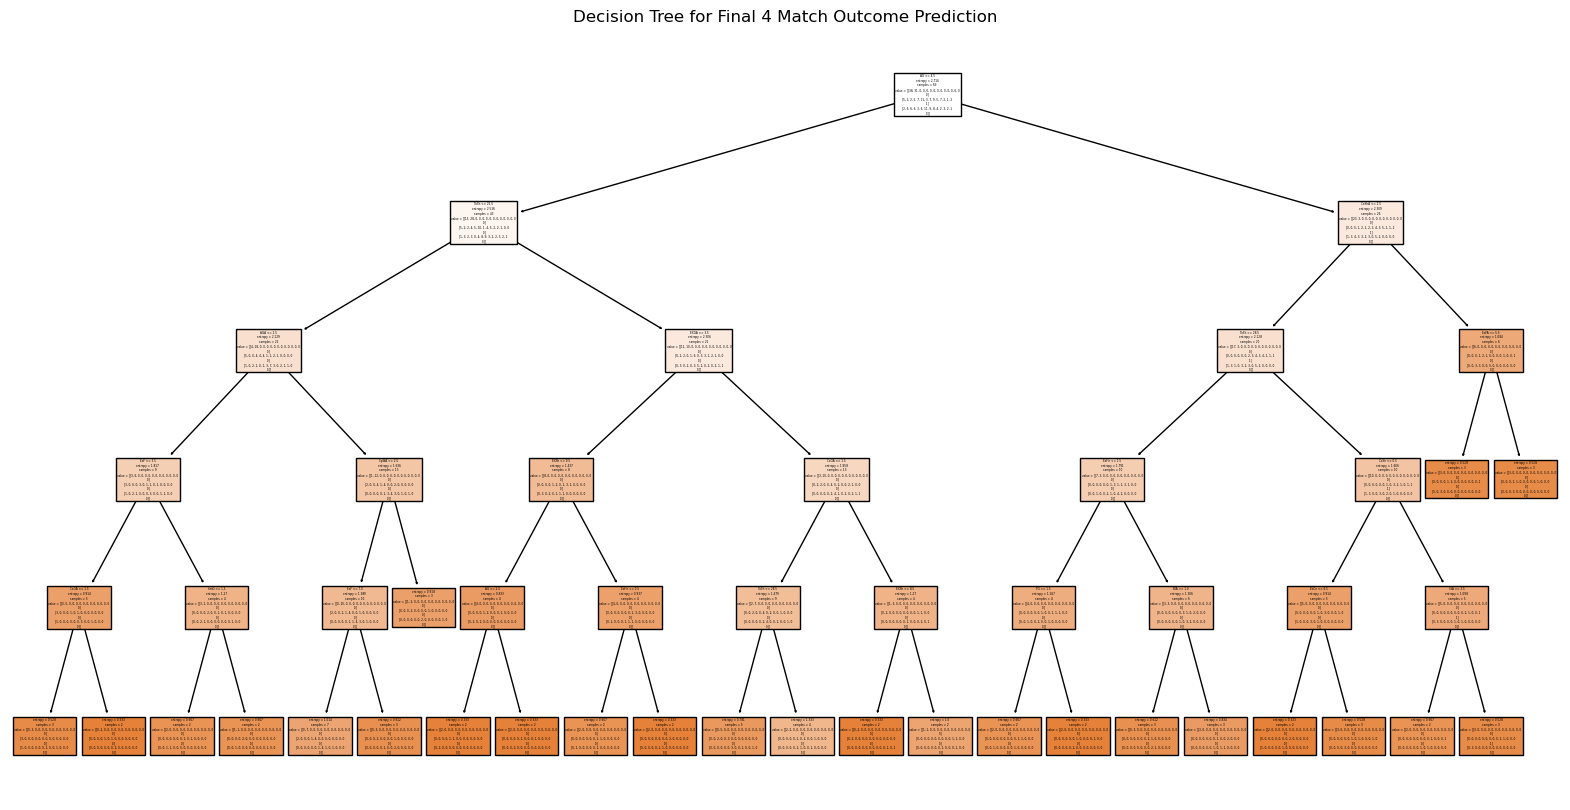

In [19]:
plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=feat_train, filled=True)
plt.title('Decision Tree for Final 4 Match Outcome Prediction')
plt.show()

In [37]:
#Predicting with ensamble RandomForestClassifier
#Good for multiple labels
rfor = RandomForestClassifier(random_state=36)
rfor.fit(X_goals,y_goals)

pred = rfor.predict(x_test_goals)
win1 = get_team_from_prediction(x_test_goals["Teams"][0], x_test_goals["TeamsA"][0], pred[0][0])
win2 = get_team_from_prediction(x_test_goals["Teams"][1], x_test_goals["TeamsA"][1], pred[1][0])

print('\033[1m' + 'PREDICTION OF RESULT WITH RANDOM FOREST' + '\033[0m')
print('First match: \nPRO RECCO - OLYMPIACOS SFP')
print(f'Winner of first match: {pred[0][0], get_team_name(win1, teams_map)}')
print(f'With score of: {pred[0][1]} - {pred[0][2]}')
print('Second match: \nFTC TELEKOM BUDAPEST - VK NOVI BEOGRAD')
print(f'Winner of second match: {pred[1][0], get_team_name(win2, teams_map)}')
print(f'With score of: {pred[1][1]} - {pred[1][2]}')

#in the final
x_test_fin = pd.DataFrame(columns = x_test.columns)
x_test_fin = new_matches_by_team(mean_teams, x_test_fin, win1, win2)
pred_fin = rfor.predict(x_test_fin[feat_train])

win_fin = get_team_from_prediction(x_test_fin["Teams"][0], x_test_fin["TeamsA"][0], pred_fin[0][0])
print('\n\033[1m' + 'FINALS PREDICTION OF RESULT WITH RANDOM FOREST' + '\033[0m')
print(f'Final match: \n{get_team_name(win1, teams_map)} - {get_team_name(win2, teams_map)}')
print(f'Winner of match: {pred_fin[0][0], get_team_name(win_fin, teams_map)}')
print(f'With score of: {pred[0][1]} - {pred[0][2]}')

PREDICTION OF RESULT WITH RANDOM FOREST
First match: 
PRO RECCO - OLYMPIACOS SFP
Winner of first match: (1, 'OLYMPIACOS SFP')
With score of: 10 - 11
Second match: 
FTC TELEKOM BUDAPEST - VK NOVI BEOGRAD
Winner of second match: (0, 'FTC TELEKOM BUDAPEST')
With score of: 12 - 11

FINALS PREDICTION OF RESULT WITH RANDOM FOREST
Final match: 
OLYMPIACOS SFP - FTC TELEKOM BUDAPEST
Winner of match: (1, 'FTC TELEKOM BUDAPEST')
With score of: 10 - 11


In [33]:
# Formatting data to percentages
percentage = pd.DataFrame({
    'Teams': home_away['Teams'],
    'ToG': home_away['ToG'],
    'ToG%': home_away['ToG'] / home_away['ToSh'],
    'AG%': home_away['AG'] / home_away['ASh'],
    'CeG%': home_away['CeG'] / home_away['CeSh'],
    'EXG%': home_away['EXG'] / home_away['EXSh'],
    '6mG%': home_away['6mG'] / home_away['6mSh'],
    'CoG%': home_away['CoG'] / home_away['CoSh'],
    'PG%': home_away['PG'] / home_away['PSh'],
    'PSOG%': home_away['PSOG'] / home_away['PSOSh'],
    'As': home_away['As'],
    'To': home_away['To'],
    'St': home_away['St'],
    'Bl': home_away['Bl'],
    'SpW%': home_away['SpW'] / home_away['Sp'],
    'ExCe': home_away['ExCe'],
    'ExF': home_away['ExF'],
    'DoEx': home_away['DoEx'],
    'P': home_away['P'],
    'ExFin': home_away['ExFin'],
    'Ex4min': home_away['Ex4min'],
    'TeamsA': home_away['TeamsA'],
    'ToGA': home_away['ToGA'],
    'ToGA%': home_away['ToGA'] / home_away['ToShA'],
    'AGA%': home_away['AGA'] / home_away['AShA'],
    'CeGA%': home_away['CeGA'] / home_away['CeShA'],
    'EXGA%': home_away['EXGA'] / home_away['EXShA'],
    '6mGA%': home_away['6mGA'] / home_away['6mShA'],
    'CoGA%': home_away['CoGA'] / home_away['CoShA'],
    'PGA%': home_away['PGA'] / home_away['PShA'],
    'PSOGA%': home_away['PSOGA'] / home_away['PSOShA'],
    'AsA': home_away['AsA'],
    'ToA': home_away['ToA'],
    'StA': home_away['StA'],
    'BlA': home_away['BlA'],
    'SpWA%': home_away['SpWA'] / home_away['SpA'],
    'ExCeA': home_away['ExCeA'],
    'ExFA': home_away['ExFA'],
    'DoExA': home_away['DoExA'],
    'PA': home_away['PA'],
    'ExFinA': home_away['ExFinA'],
    'Ex4minA': home_away['Ex4minA'],
    'Won': home_away['Won']
})

# Formatting data to percentages for mean_percentage DataFrame
mean_percentage = pd.DataFrame({
    'Teams': match_csv_a['Teams'],
    'ToG': match_csv_a['ToG'],
    'ToG%': match_csv_a['ToG'] / match_csv_a['ToSh'],
    'AG%': match_csv_a['AG'] / match_csv_a['ASh'],
    'CeG%': match_csv_a['CeG'] / match_csv_a['CeSh'],
    'EXG%': match_csv_a['EXG'] / match_csv_a['EXSh'],
    '6mG%': match_csv_a['6mG'] / match_csv_a['6mSh'],
    'CoG%': match_csv_a['CoG'] / match_csv_a['CoSh'],
    'PG%': match_csv_a['PG'] / match_csv_a['PSh'],
    'PSOG%': match_csv_a['PSOG'] / match_csv_a['PSOSh'],
    'As': match_csv_a['As'],
    'To': match_csv_a['To'],
    'St': match_csv_a['St'],
    'Bl': match_csv_a['Bl'],
    'SpW%': match_csv_a['SpW'] / match_csv_a['Sp'],
    'ExCe': match_csv_a['ExCe'],
    'ExF': match_csv_a['ExF'],
    'DoEx': match_csv_a['DoEx'],
    'P': match_csv_a['P'],
    'ExFin': match_csv_a['ExFin'],
    'Ex4min': match_csv_a['Ex4min']
})

#replacing NaN with 0.0
percentage = percentage.fillna(0.0)
mean_percentage = mean_percentage.fillna(0.0)
percentage

,Teams,ToG,ToG%,AG%,CeG%,EXG%,6mG%,CoG%,PG%,PSOG%,...,StA,BlA,SpWA%,ExCeA,ExFA,DoExA,PA,ExFinA,Ex4minA,Won
0,12,19,0.558824,0.500000,1.000000,0.750000,0.444444,0.750000,0.5,0.000000,...,7,2,0.25,6,2,0,2,1,0,0
1,1,5,0.227273,0.500000,1.000000,0.222222,0.100000,0.000000,0.0,0.800000,...,9,2,0.75,7,3,1,0,2,0,1
2,8,12,0.342857,0.133333,0.333333,0.466667,0.000000,0.000000,1.0,0.666667,...,4,3,0.25,10,4,0,2,1,0,0
3,9,15,0.500000,0.466667,0.333333,0.625000,0.000000,1.000000,0.0,0.000000,...,4,1,0.25,7,3,0,0,1,0,0
4,5,9,0.272727,0.312500,0.333333,0.272727,0.000000,0.000000,0.0,0.000000,...,2,3,0.25,8,5,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,12,13,0.500000,0.500000,0.000000,0.545455,0.000000,0.666667,1.0,0.000000,...,7,3,0.50,8,5,1,2,0,0,0
65,5,13,0.406250,0.473684,0.000000,0.375000,0.333333,0.000000,0.0,0.000000,...,4,1,0.50,6,3,0,0,2,0,0
66,8,17,0.607143,0.444444,0.333333,0.777778,0.333333,1.000000,1.0,0.000000,...,7,3,0.25,6,4,0,1,1,0,0
67,9,15,0.600000,0.250000,1.000000,0.727273,0.000000,1.000000,1.0,0.000000,...,2,0,0.25,8,6,0,2,2,0,0


In [22]:
#defining new method for adding matches to a new DataFrame by team ID
def new_matches_by_team_perc(df, new_df, team1, team2):
    sem_fin = []
    home_val = df.loc[df['Teams'] == team1].values
    away_val = df.loc[df['Teams'] == team2].values
    for j in home_val[0]:
            sem_fin.append(j)
    
    for k in away_val[0]:
            sem_fin.append(k)
    new_df.loc[len(new_df.index)] = sem_fin
    return new_df

In [23]:
#Making training data feom percentage data
#makes list of features
features_perc = list(percentage.columns)
features_perc.remove('Won')

#removes features for training data
feat_train_perc = features_perc.copy()
for i in ['ToG', 'ToGA']:
    feat_train_perc.remove(i)

In [24]:
#training data
X_perc = percentage[features_perc]
y_perc = percentage[['Won']]

In [25]:
#Taking mean performance trought season as test data
mean_teams_perc = mean_percentage.groupby('Teams').mean().reset_index()
mean_teams_perc.loc[mean_teams_perc['Teams'].isin([5,8,9,12])]

,Teams,ToG,ToG%,AG%,CeG%,EXG%,6mG%,CoG%,PG%,PSOG%,...,To,St,Bl,SpW%,ExCe,ExF,DoEx,P,ExFin,Ex4min
5,5,12.750000,0.471044,0.440294,0.333333,0.528009,0.194444,0.291667,0.291667,0.083333,...,3.416667,5.833333,3.416667,0.479167,7.916667,2.416667,0.083333,1.750000,0.500000,0.0
8,8,12.916667,0.487392,0.337546,0.312500,0.577198,0.285185,0.236111,0.944444,0.126984,...,2.250000,4.916667,3.250000,0.500000,7.250000,3.500000,0.083333,1.166667,0.750000,0.0
9,9,13.666667,0.538055,0.418510,0.605556,0.633075,0.241667,0.208333,0.588889,0.083333,...,3.333333,4.083333,2.083333,0.604167,9.083333,4.166667,0.000000,1.166667,1.583333,0.0
12,12,12.666667,0.527334,0.469066,0.375000,0.591035,0.219194,0.256944,0.813889,0.066667,...,3.333333,4.500000,2.666667,0.541667,5.416667,5.000000,0.166667,1.666667,1.000000,0.0


In [26]:
#Picking semi-finalists and making semi-finals matches
x_test_perc = pd.DataFrame(columns=features_perc)
x_test_perc = new_matches_by_team_perc(mean_teams_perc, x_test_perc, 9, 8)
x_test_perc = new_matches_by_team_perc(mean_teams_perc, x_test_perc, 5, 12)
x_test_perc

,Teams,ToG,ToG%,AG%,CeG%,EXG%,6mG%,CoG%,PG%,PSOG%,...,ToA,StA,BlA,SpWA%,ExCeA,ExFA,DoExA,PA,ExFinA,Ex4minA
0,9.0,13.666667,0.538055,0.418510,0.605556,0.633075,0.241667,0.208333,0.588889,0.083333,...,2.250000,4.916667,3.250000,0.500000,7.250000,3.5,0.083333,1.166667,0.75,0.0
1,5.0,12.750000,0.471044,0.440294,0.333333,0.528009,0.194444,0.291667,0.291667,0.083333,...,3.333333,4.500000,2.666667,0.541667,5.416667,5.0,0.166667,1.666667,1.00,0.0


In [27]:
#training with percentage
dtree = DecisionTreeClassifier()
dtree.fit(X_perc,y_perc)

pred = dtree.predict(x_test_perc)

#get winner tem names
win1 = get_team_from_prediction(x_test_perc["Teams"][0], x_test_perc["TeamsA"][0], pred[0])
win2 = get_team_from_prediction(x_test_perc["Teams"][1], x_test_perc["TeamsA"][1], pred[1])
print('\033[1m' + 'PREDICTION WITHOUT PARAMETERS' + '\033[0m')
print('First match: \nPRO RECCO - OLYMPIACOS SFP')
print(f'Winner of first match: {pred[0], get_team_name(win1, teams_map)}')
print('Second match: \nFTC TELEKOM BUDAPEST - VK NOVI BEOGRAD')
print(f'Winner of second match: {pred[1], get_team_name(win2, teams_map)}')

#in the final
x_test_fin = pd.DataFrame(columns = x_test_perc.columns)

x_test_fin = new_matches_by_team(mean_teams_perc, x_test_fin, win1, win2)
pred_fin = dtree.predict(x_test_fin)

win_fin = get_team_from_prediction(x_test_fin["Teams"][0], x_test_fin["TeamsA"][0], pred_fin[0])
print('\n\033[1m' + 'FINALS PREDICTION WITHOUT PARAMETERS' + '\033[0m')
print(f'Final match: \n{get_team_name(win1, teams_map)} - {get_team_name(win2, teams_map)}')
print(f'Winner of match: {pred_fin[0], get_team_name(win_fin, teams_map)}')

PREDICTION WITHOUT PARAMETERS
First match: 
PRO RECCO - OLYMPIACOS SFP
Winner of first match: (1, 'OLYMPIACOS SFP')
Second match: 
FTC TELEKOM BUDAPEST - VK NOVI BEOGRAD
Winner of second match: (1, 'VK NOVI BEOGRAD')

FINALS PREDICTION WITHOUT PARAMETERS
Final match: 
OLYMPIACOS SFP - VK NOVI BEOGRAD
Winner of match: (0, 'OLYMPIACOS SFP')


In [28]:
#Testing best parameters for decision tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.75]
}

print('\033[1m' + 'PREDICTION WITH BEST ESTIMATOR' + '\033[0m')

#GridSearchCV for parameter testing
dtree = DecisionTreeClassifier(random_state=42)
k_folds = KFold(n_splits = 5)
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=k_folds, n_jobs=-1, verbose=2)
grid_search.fit(X_perc,y_perc)

#Best model
best_clf = grid_search.best_estimator_

# Evaluate the model using cross-validation
cv_scores = cross_val_score(best_clf, X_perc,y_perc, cv=k_folds)

print(f'The Best Estimator: {best_clf}')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Average Cross-Validation Accuracy: {np.mean(cv_scores)}')

#predicting with model
pred = best_clf.predict(x_test_perc)

win1 = get_team_from_prediction(x_test_perc["Teams"][0], x_test_perc["TeamsA"][0], pred[0])
win2 = get_team_from_prediction(x_test_perc["Teams"][1], x_test_perc["TeamsA"][1], pred[1])

print('\nFirst match: \nPRO RECCO - OLYMPIACOS SFP')
print(f'Winner of first match: {pred[0], get_team_name(win1, teams_map)}')
print('Second match: \nFTC TELEKOM BUDAPEST - VK NOVI BEOGRAD')
print(f'Winner of second match: {pred[1], get_team_name(win2, teams_map)}')

#in the final
x_test_fin = pd.DataFrame(columns = x_test_perc.columns)
x_test_fin = new_matches_by_team(mean_teams_perc, x_test_fin, win1, win2)
pred_fin = best_clf.predict(x_test_fin)

win_fin = get_team_from_prediction(x_test_fin["Teams"][0], x_test_fin["TeamsA"][0], pred_fin[0])
print('\n\033[1m' + 'FINALS PREDICTION WITH BEST ESTIMATOR' + '\033[0m')
print(f'Final match: \n{get_team_name(win1, teams_map)} - {get_team_name(win2, teams_map)}')
print(f'Winner of match: {pred_fin[0], get_team_name(win_fin, teams_map)}')

PREDICTION WITH BEST ESTIMATOR
Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
The Best Estimator: DecisionTreeClassifier(min_samples_leaf=2, random_state=42, splitter='random')
Cross-Validation Accuracy Scores: [0.78571429 0.92857143 0.92857143 0.71428571 0.92307692]
Average Cross-Validation Accuracy: 0.8560439560439562

First match: 
PRO RECCO - OLYMPIACOS SFP
Winner of first match: (0, 'PRO RECCO')
Second match: 
FTC TELEKOM BUDAPEST - VK NOVI BEOGRAD
Winner of second match: (0, 'FTC TELEKOM BUDAPEST')

FINALS PREDICTION WITH BEST ESTIMATOR
Final match: 
PRO RECCO - FTC TELEKOM BUDAPEST
Winner of match: (1, 'FTC TELEKOM BUDAPEST')


In [29]:
#Multi labelled training
#Predicting the score of the match
X_goals_perc = percentage[feat_train_perc]
y_goals_perc = percentage[['Won', 'ToG', 'ToGA']]
x_test_goals_perc = x_test_perc[feat_train_perc]

In [30]:
#Decision Tree with best parameters from previos testing
dtree = DecisionTreeClassifier(random_state=42, splitter='random')
dtree.fit(X_goals_perc, y_goals_perc)

pred = dtree.predict(x_test_goals_perc)
win1 = get_team_from_prediction(x_test_goals_perc["Teams"][0], x_test_goals_perc["TeamsA"][0], pred[0][0])
win2 = get_team_from_prediction(x_test_goals_perc["Teams"][1], x_test_goals_perc["TeamsA"][1], pred[1][0])

print('\033[1m' + 'PREDICTION OF RESULT WITH PARAMETERS' + '\033[0m')
print('First match: \nPRO RECCO - OLYMPIACOS SFP')
print(f'Winner of first match: {pred[0][0], get_team_name(win1, teams_map)}')
print(f'With score of: {pred[0][1]} - {pred[0][2]}')
print('Second match: \nFTC TELEKOM BUDAPEST - VK NOVI BEOGRAD')
print(f'Winner of second match: {pred[1][0], get_team_name(win2, teams_map)}')
print(f'With score of: {pred[1][1]} - {pred[1][2]}')


#in the final
x_test_fin = pd.DataFrame(columns = x_test_perc.columns)
x_test_fin = new_matches_by_team(mean_teams_perc, x_test_fin, win1, win2)
pred_fin = dtree.predict(x_test_fin[feat_train_perc])

win_fin = get_team_from_prediction(x_test_fin["Teams"][0], x_test_fin["TeamsA"][0], pred_fin[0][0])
print('\n\033[1m' + 'FINALS PREDICTION WITH PARAMETERS' + '\033[0m')
print(f'Final match: \n{get_team_name(win1, teams_map)} - {get_team_name(win2, teams_map)}')
print(f'Winner of match: {pred_fin[0][0], get_team_name(win_fin, teams_map)}')
print(f'With score of: {pred[0][1]} - {pred[0][2]}')

PREDICTION OF RESULT WITH PARAMETERS
First match: 
PRO RECCO - OLYMPIACOS SFP
Winner of first match: (1, 'OLYMPIACOS SFP')
With score of: 10 - 13
Second match: 
FTC TELEKOM BUDAPEST - VK NOVI BEOGRAD
Winner of second match: (0, 'FTC TELEKOM BUDAPEST')
With score of: 19 - 13

FINALS PREDICTION WITH PARAMETERS
Final match: 
OLYMPIACOS SFP - FTC TELEKOM BUDAPEST
Winner of match: (1, 'FTC TELEKOM BUDAPEST')
With score of: 10 - 13


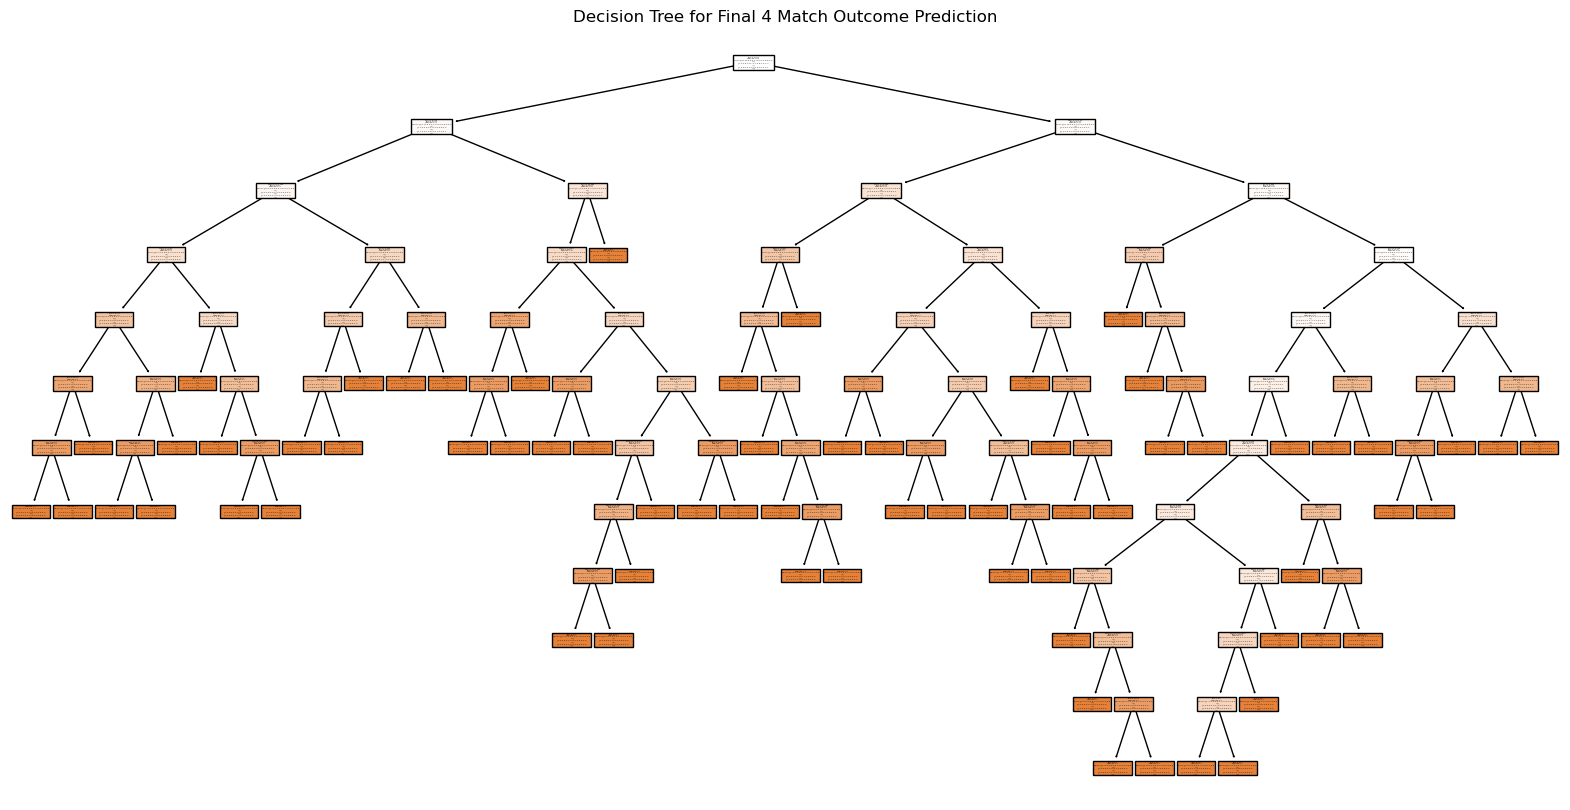

In [31]:
plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=feat_train_perc, filled=True)
plt.title('Decision Tree for Final 4 Match Outcome Prediction')
plt.show()

In [32]:
#Predicting with ensamble RandomForestClassifier
#Good for multiple labels
rfor = RandomForestClassifier(random_state=0)
rfor.fit(X_goals_perc, y_goals_perc)

pred = rfor.predict(x_test_goals_perc)
win1 = get_team_from_prediction(x_test_goals_perc["Teams"][0], x_test_goals_perc["TeamsA"][0], pred[0][0])
win2 = get_team_from_prediction(x_test_goals_perc["Teams"][1], x_test_goals_perc["TeamsA"][1], pred[1][0])

print('\033[1m' + 'PREDICTION OF RESULT WITH RANDOM FOREST' + '\033[0m')
print('First match: \nPRO RECCO - OLYMPIACOS SFP')
print(f'Winner of first match: {pred[0][0], get_team_name(win1, teams_map)}')
print(f'With score of: {pred[0][1]} - {pred[0][2]}')
print('Second match: \nFTC TELEKOM BUDAPEST - VK NOVI BEOGRAD')
print(f'Winner of second match: {pred[1][0], get_team_name(win2, teams_map)}')
print(f'With score of: {pred[1][1]} - {pred[1][2]}')

#in the final
x_test_fin = pd.DataFrame(columns = x_test_perc.columns)
x_test_fin = new_matches_by_team(mean_teams_perc, x_test_fin, win1, win2)
pred_fin = rfor.predict(x_test_fin[feat_train_perc])

win_fin = get_team_from_prediction(x_test_fin["Teams"][0], x_test_fin["TeamsA"][0], pred_fin[0][0])
print('\n\033[1m' + 'FINALS PREDICTION OF RESULT WITH RANDOM FOREST' + '\033[0m')
print(f'Final match: \n{get_team_name(win1, teams_map)} - {get_team_name(win2, teams_map)}')
print(f'Winner of match: {pred_fin[0][0], get_team_name(win_fin, teams_map)}')
print(f'With score of: {pred[0][1]} - {pred[0][2]}')

PREDICTION OF RESULT WITH RANDOM FOREST
First match: 
PRO RECCO - OLYMPIACOS SFP
Winner of first match: (0, 'PRO RECCO')
With score of: 13 - 12
Second match: 
FTC TELEKOM BUDAPEST - VK NOVI BEOGRAD
Winner of second match: (1, 'VK NOVI BEOGRAD')
With score of: 5 - 12

FINALS PREDICTION OF RESULT WITH RANDOM FOREST
Final match: 
PRO RECCO - VK NOVI BEOGRAD
Winner of match: (0, 'PRO RECCO')
With score of: 13 - 12
